In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
path_main = "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/dataset.csv"
df_main = pd.read_csv(path_main)
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
path_weight = "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/Symptom-severity.csv"
df_weight = pd.read_csv(path_weight)
df_weight.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [4]:
cols = df_main.columns
data = df_main[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df_main.shape)

df_main = pd.DataFrame(s, columns=df_main.columns)
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_main = df_main.fillna(0)
df_main.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = df_main.columns
vals = df_main.values
symptoms = df_weight['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_weight[df_weight['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

In [7]:
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def label_encode(labels):
    label_encoder.fit(labels)
    label_sequences = label_encoder.transform(labels)
    return label_sequences

df['Disease'] = label_encode(df['Disease'])

In [10]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,2,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,38,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,35,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [11]:
x = df.drop(columns=['Disease'])
y = df['Disease']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.2, random_state=1)

In [13]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_train, y_train))

Epoch 1/30
123/123 [==============================] - 4s 15ms/step - loss: 1.9037 - accuracy: 0.4873 - val_loss: 0.9823 - val_accuracy: 0.7124
Epoch 2/30
123/123 [==============================] - 1s 12ms/step - loss: 0.7517 - accuracy: 0.7965 - val_loss: 0.5911 - val_accuracy: 0.8214
Epoch 3/30
123/123 [==============================] - 2s 15ms/step - loss: 0.4994 - accuracy: 0.8631 - val_loss: 0.3775 - val_accuracy: 0.8953
Epoch 4/30
123/123 [==============================] - 2s 15ms/step - loss: 0.3419 - accuracy: 0.9073 - val_loss: 0.2792 - val_accuracy: 0.9289
Epoch 5/30
123/123 [==============================] - 3s 23ms/step - loss: 0.2612 - accuracy: 0.9256 - val_loss: 0.2115 - val_accuracy: 0.9436
Epoch 6/30
123/123 [==============================] - 3s 22ms/step - loss: 0.2012 - accuracy: 0.9466 - val_loss: 0.1511 - val_accuracy: 0.9665
Epoch 7/30
123/123 [==============================] - 1s 9ms/step - loss: 0.1552 - accuracy: 0.9550 - val_loss: 0.1243 - val_accuracy: 0.9563


In [14]:
import matplotlib.pyplot as plt

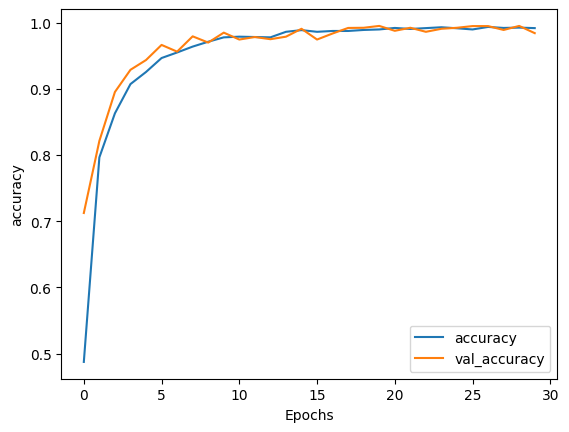

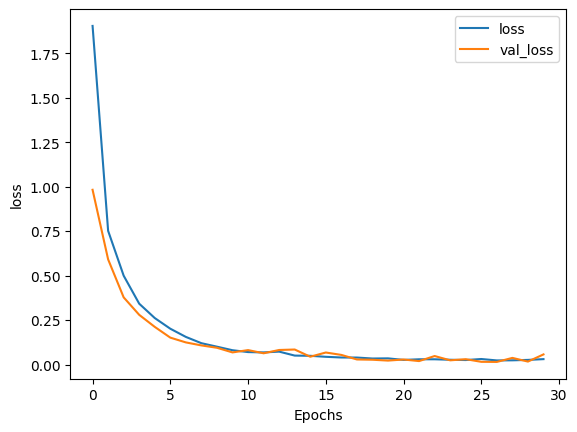

In [15]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
#filepath = "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/model.h5"

In [17]:
#model.save(filepath, save_format='h5')

In [18]:
#!pip install tensorflowjs

In [19]:
#import tensorflowjs as tfjs

In [20]:
#tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist")

In [21]:
test = x_test[10:20]
test_label = y_test[10:20]

In [22]:
prediction = model.predict_on_batch(
    test
)

In [23]:
prediction

array([[6.73071961e-32, 0.00000000e+00, 1.85969925e-19, 1.63184652e-07,
        5.25946431e-29, 1.81812733e-30, 1.01333334e-33, 4.09271570e-37,
        6.96448108e-18, 4.07451440e-25, 5.86224037e-19, 5.63745152e-06,
        3.72014736e-14, 0.00000000e+00, 8.77611367e-22, 3.06878757e-23,
        5.18596508e-08, 3.57558502e-25, 1.61340174e-25, 6.82574182e-06,
        1.88642114e-12, 4.87310105e-12, 1.36603158e-13, 6.57877281e-30,
        9.99983013e-01, 4.27033228e-06, 4.52826948e-15, 3.29155007e-30,
        6.74833977e-22, 2.26981367e-09, 1.73652013e-20, 1.11207650e-32,
        2.05516163e-22, 2.42138061e-35, 2.08078628e-12, 0.00000000e+00,
        2.87880294e-16, 1.70217746e-11, 5.58533601e-11, 3.40207082e-19,
        3.06411052e-14],
       [1.76375383e-04, 1.48446340e-08, 8.76047686e-25, 3.48152252e-13,
        9.45743372e-15, 1.30771900e-06, 5.80450933e-06, 9.99223769e-01,
        3.68890641e-15, 2.61062614e-05, 3.11876210e-14, 1.12609310e-13,
        1.01775125e-14, 5.37760836e-10,

In [24]:
import numpy as np

In [25]:
for i in prediction:
  top_3 = np.argsort(i)[-1:][::-1]
  print(label_encoder.inverse_transform(top_3))
  print(top_3)

['Hyperthyroidism']
[24]
['Cervical spondylosis']
[7]
['Migraine']
[30]
['(vertigo) Paroymsal  Positional Vertigo']
[0]
['Varicose veins']
[39]
['Dengue']
[11]
['Chronic cholestasis']
[9]
['Paralysis (brain hemorrhage)']
[32]
['Tuberculosis']
[36]
['Hepatitis C']
[20]


In [26]:
label_encoder.inverse_transform(test_label)

array(['Hyperthyroidism', 'Cervical spondylosis', 'Migraine',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Dengue', 'Chronic cholestasis', 'Paralysis (brain hemorrhage)',
       'Tuberculosis', 'Hepatitis C'], dtype=object)

In [27]:
#label_mapping = {label: encoded_label for label, encoded_label in zip(df_main['Disease'].tolist(),y)}

In [28]:
#dict_output = pd.DataFrame.from_dict(label_mapping, orient='index', columns=['EncodedLabel'])
#dict_output.index.name = 'OriginalLabel'

#Print the DataFrame
#print(dict_output)

In [29]:
#csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/dict_output.csv'
#dict_output.to_csv(csv_filename)